In [1]:
import keras
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Lambda, Cropping2D,Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
import math

Using TensorFlow backend.


In [2]:
data_stack = []
for i in os.listdir("Training_Data"):
    if i.startswith("Data"):
        data_stack.append(i)
print(data_stack)

['Data_v7_dark', 'Data_v6_reverse_copy', 'Data_v1', 'Data_v3', 'Data_v4', 'Data_v2', 'Data_v8_dark_reverse', 'Data_v6_reverse', 'Data_v5']


In [3]:
# saving names and image data in two different Lists : image_names = labels, image_array = training date/input data
gray = False
resizing = True
image_names = []
image_array = []
for image_folder in data_stack:
    print("opening "+image_folder)
    path = "Training_Data/"+image_folder
    for img in os.listdir("Training_Data/"+image_folder):
        if img.endswith(".jpeg"):
            #print(img)
            image_names.append(img)
            if gray == True and resizing == True:
                image_array.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(path, img)),cv2.COLOR_RGB2GRAY),(64,64)))
            elif gray == False and resizing == True:
                image_array.append(cv2.resize(cv2.imread(os.path.join(path, img)),(64,64)))
            else:
                image_array.append(cv2.imread(os.path.join(path, img)))
#frame = cv2.imread(os.path.join(image_folder, images[0]))
#row, col, ch = frame.shape
#print(row, col, ch)
print(len(image_names))
print(len(image_array))

opening Data_v7_dark
opening Data_v6_reverse_copy
opening Data_v1
opening Data_v3
opening Data_v4
opening Data_v2
opening Data_v8_dark_reverse
opening Data_v6_reverse
opening Data_v5
12033
12033


In [4]:
# extracting the two determined labels of the image_names list:
values_array = []
for value in image_names:
    #print(value)
    splitted = value.split(",")
    print("Img-Number: "+ splitted[1]+" Acceleration: "+ splitted[2]+" Angle_param: "+splitted[3].split(".")[0])
    values_array.append((splitted[2],splitted[3].split(".")[0]))


Img-Number: 1442 Acceleration: 91 Angle_param: 410
Img-Number: 637 Acceleration: 74 Angle_param: 361
Img-Number: 222 Acceleration: 65 Angle_param: 358
Img-Number: 947 Acceleration: 42 Angle_param: 345
Img-Number: 109 Acceleration: 46 Angle_param: 344
Img-Number: 1418 Acceleration: 75 Angle_param: 459
Img-Number: 1643 Acceleration: 24 Angle_param: 339
Img-Number: 822 Acceleration: 52 Angle_param: 349
Img-Number: 156 Acceleration: 52 Angle_param: 416
Img-Number: 1245 Acceleration: 46 Angle_param: 348
Img-Number: 616 Acceleration: 65 Angle_param: 358
Img-Number: 1627 Acceleration: 15 Angle_param: 333
Img-Number: 1635 Acceleration: 37 Angle_param: 342
Img-Number: 717 Acceleration: 100 Angle_param: 422
Img-Number: 23 Acceleration: 41 Angle_param: 342
Img-Number: 72 Acceleration: 56 Angle_param: 348
Img-Number: 869 Acceleration: 100 Angle_param: 398
Img-Number: 1646 Acceleration: 24 Angle_param: 339
Img-Number: 1527 Acceleration: 99 Angle_param: 378
Img-Number: 1188 Acceleration: 60 Angle_pa

Img-Number: 1053 Acceleration: 95 Angle_param: 376
Img-Number: 26 Acceleration: 58 Angle_param: 353
Img-Number: 467 Acceleration: 65 Angle_param: 361
Img-Number: 843 Acceleration: 62 Angle_param: 350
Img-Number: 584 Acceleration: 45 Angle_param: 347
Img-Number: 214 Acceleration: 100 Angle_param: 402
Img-Number: 466 Acceleration: 65 Angle_param: 361
Img-Number: 430 Acceleration: 98 Angle_param: 410
Img-Number: 621 Acceleration: 100 Angle_param: 411
Img-Number: 172 Acceleration: 35 Angle_param: 342
Img-Number: 659 Acceleration: 93 Angle_param: 366
Img-Number: 955 Acceleration: 70 Angle_param: 362
Img-Number: 48 Acceleration: 79 Angle_param: 375
Img-Number: 618 Acceleration: 100 Angle_param: 410
Img-Number: 520 Acceleration: 41 Angle_param: 473
Img-Number: 269 Acceleration: 95 Angle_param: 385
Img-Number: 203 Acceleration: 39 Angle_param: 346
Img-Number: 807 Acceleration: 91 Angle_param: 377
Img-Number: 196 Acceleration: 100 Angle_param: 410
Img-Number: 351 Acceleration: 100 Angle_param: 

Img-Number: 431 Acceleration: 65 Angle_param: 455
Img-Number: 534 Acceleration: 100 Angle_param: 435
Img-Number: 38 Acceleration: 83 Angle_param: 367
Img-Number: 573 Acceleration: 100 Angle_param: 434
Img-Number: 450 Acceleration: 29 Angle_param: 337
Img-Number: 574 Acceleration: 100 Angle_param: 420
Img-Number: 393 Acceleration: 63 Angle_param: 355
Img-Number: 421 Acceleration: 0 Angle_param: 330
Img-Number: 220 Acceleration: 100 Angle_param: 400
Img-Number: 445 Acceleration: 91 Angle_param: 438
Img-Number: 734 Acceleration: 55 Angle_param: 348
Img-Number: 30 Acceleration: 25 Angle_param: 340
Img-Number: 948 Acceleration: 100 Angle_param: 415
Img-Number: 434 Acceleration: 57 Angle_param: 461
Img-Number: 305 Acceleration: 62 Angle_param: 362
Img-Number: 899 Acceleration: 24 Angle_param: 335
Img-Number: 487 Acceleration: 100 Angle_param: 384
Img-Number: 1035 Acceleration: 88 Angle_param: 366
Img-Number: 998 Acceleration: 48 Angle_param: 346
Img-Number: 173 Acceleration: 37 Angle_param: 

Img-Number: 584 Acceleration: 35 Angle_param: 336
Img-Number: 658 Acceleration: 59 Angle_param: 379
Img-Number: 479 Acceleration: 16 Angle_param: 333
Img-Number: 1220 Acceleration: 47 Angle_param: 346
Img-Number: 977 Acceleration: 100 Angle_param: 394
Img-Number: 1195 Acceleration: 0 Angle_param: 330
Img-Number: 223 Acceleration: 88 Angle_param: 397
Img-Number: 15 Acceleration: 0 Angle_param: 410
Img-Number: 1082 Acceleration: 9 Angle_param: 330
Img-Number: 368 Acceleration: 22 Angle_param: 333
Img-Number: 460 Acceleration: -85 Angle_param: 448
Img-Number: 269 Acceleration: 23 Angle_param: 336
Img-Number: 795 Acceleration: 7 Angle_param: 331
Img-Number: 685 Acceleration: 0 Angle_param: 408
Img-Number: 298 Acceleration: 30 Angle_param: 467
Img-Number: 609 Acceleration: 87 Angle_param: 363
Img-Number: 1330 Acceleration: 100 Angle_param: 380
Img-Number: 742 Acceleration: 47 Angle_param: 345
Img-Number: 721 Acceleration: 5 Angle_param: 330
Img-Number: 485 Acceleration: 2 Angle_param: 330
I

Img-Number: 288 Acceleration: 0 Angle_param: 410
Img-Number: 139 Acceleration: 39 Angle_param: 479
Img-Number: 1016 Acceleration: 100 Angle_param: 371
Img-Number: 530 Acceleration: 0 Angle_param: 410
Img-Number: 1295 Acceleration: 77 Angle_param: 358
Img-Number: 731 Acceleration: 56 Angle_param: 348
Img-Number: 72 Acceleration: 0 Angle_param: 410
Img-Number: 551 Acceleration: 0 Angle_param: 410
Img-Number: 784 Acceleration: 89 Angle_param: 454
Img-Number: 1034 Acceleration: 100 Angle_param: 372
Img-Number: 1367 Acceleration: 0 Angle_param: 408
Img-Number: 1078 Acceleration: 1 Angle_param: 330
Img-Number: 834 Acceleration: 100 Angle_param: 389
Img-Number: 1201 Acceleration: 86 Angle_param: 366
Img-Number: 963 Acceleration: 100 Angle_param: 429
Img-Number: 41 Acceleration: 0 Angle_param: 410
Img-Number: 1348 Acceleration: 44 Angle_param: 345
Img-Number: 1022 Acceleration: 100 Angle_param: 427
Img-Number: 683 Acceleration: 100 Angle_param: 386
Img-Number: 276 Acceleration: 31 Angle_param:

Img-Number: 88 Acceleration: 48 Angle_param: 349
Img-Number: 333 Acceleration: 88 Angle_param: 383
Img-Number: 1735 Acceleration: 90 Angle_param: 448
Img-Number: 1683 Acceleration: 100 Angle_param: 418
Img-Number: 1830 Acceleration: 77 Angle_param: 452
Img-Number: 578 Acceleration: 100 Angle_param: 431
Img-Number: 2207 Acceleration: 75 Angle_param: 463
Img-Number: 1887 Acceleration: 100 Angle_param: 410
Img-Number: 1685 Acceleration: 96 Angle_param: 443
Img-Number: 2072 Acceleration: 100 Angle_param: 410
Img-Number: 1885 Acceleration: 100 Angle_param: 402
Img-Number: 2308 Acceleration: 82 Angle_param: 410
Img-Number: 1329 Acceleration: 100 Angle_param: 385
Img-Number: 159 Acceleration: 28 Angle_param: 471
Img-Number: 1551 Acceleration: 93 Angle_param: 447
Img-Number: 1990 Acceleration: 100 Angle_param: 405
Img-Number: 1982 Acceleration: 100 Angle_param: 394
Img-Number: 992 Acceleration: 100 Angle_param: 410
Img-Number: 934 Acceleration: 24 Angle_param: 477
Img-Number: 1279 Acceleration

Img-Number: 731 Acceleration: 72 Angle_param: 366
Img-Number: 1054 Acceleration: 59 Angle_param: 378
Img-Number: 549 Acceleration: 40 Angle_param: 345
Img-Number: 1350 Acceleration: 64 Angle_param: 362
Img-Number: 871 Acceleration: 100 Angle_param: 411
Img-Number: 420 Acceleration: 35 Angle_param: 412
Img-Number: 102 Acceleration: 23 Angle_param: 411
Img-Number: 1318 Acceleration: 88 Angle_param: 437
Img-Number: 1459 Acceleration: 54 Angle_param: 352
Img-Number: 88 Acceleration: 45 Angle_param: 412
Img-Number: 485 Acceleration: 91 Angle_param: 444
Img-Number: 395 Acceleration: 28 Angle_param: 344
Img-Number: 178 Acceleration: 56 Angle_param: 464
Img-Number: 176 Acceleration: 27 Angle_param: 476
Img-Number: 994 Acceleration: 100 Angle_param: 394
Img-Number: 1142 Acceleration: 83 Angle_param: 377
Img-Number: 599 Acceleration: 100 Angle_param: 398
Img-Number: 1391 Acceleration: 98 Angle_param: 398
Img-Number: 1668 Acceleration: 100 Angle_param: 393
Img-Number: 120 Acceleration: 45 Angle_p

In [5]:
# reevolve the values of steering to -1,1 values and Acc values to 0,1
value_array_1 = []
for i in values_array:
    value_array_1.append((round(int(i[0])/100,1),round((float(i[1])-410)/80,1)))
    



In [11]:
for i in value_array_1:
    print(i)

(0.9, 0.0)
(0.7, -0.6)
(0.7, -0.7)
(0.4, -0.8)
(0.5, -0.8)
(0.8, 0.6)
(0.2, -0.9)
(0.5, -0.8)
(0.5, 0.1)
(0.5, -0.8)
(0.7, -0.7)
(0.1, -1.0)
(0.4, -0.8)
(1.0, 0.1)
(0.4, -0.8)
(0.6, -0.8)
(1.0, -0.1)
(0.2, -0.9)
(1.0, -0.4)
(0.6, -0.7)
(0.9, 0.0)
(0.2, -0.9)
(1.0, -0.1)
(1.0, 0.1)
(0.8, -0.5)
(1.0, 0.0)
(1.0, -0.4)
(0.3, -0.8)
(1.0, 0.1)
(1.0, -0.3)
(0.5, -0.8)
(0.6, -0.7)
(0.4, -0.8)
(0.3, -0.9)
(0.4, -0.8)
(1.0, -0.1)
(0.7, -0.6)
(0.9, 0.3)
(0.9, 0.4)
(0.5, -0.8)
(1.0, -0.2)
(0.8, 0.5)
(1.0, 0.2)
(1.0, -0.2)
(1.0, 0.1)
(0.7, 0.7)
(0.2, -0.9)
(0.9, 0.6)
(1.0, 0.0)
(0.4, 0.5)
(0.8, 0.5)
(0.5, -0.8)
(0.6, 0.3)
(0.4, -0.8)
(0.7, -0.6)
(0.3, -0.9)
(0.6, 0.7)
(1.0, -0.0)
(0.4, 0.8)
(0.6, -0.8)
(0.0, 0.0)
(0.9, 0.5)
(0.1, -1.0)
(1.0, -0.2)
(1.0, 0.0)
(0.9, 0.4)
(0.3, -0.8)
(0.7, -0.6)
(0.9, 0.0)
(0.9, -0.1)
(0.2, -0.9)
(1.0, -0.3)
(0.7, -0.6)
(0.8, -0.5)
(0.2, -0.9)
(0.6, -0.8)
(1.0, -0.1)
(0.8, 0.0)
(1.0, 0.4)
(1.0, 0.4)
(0.4, -0.8)
(1.0, 0.0)
(0.2, -0.9)
(0.3, -0.9)
(1.0, 0.0)
(0.6, -0.8)

(1.0, 0.3)
(0.5, -0.7)
(0.7, -0.6)
(0.2, -0.9)
(0.7, -0.7)
(1.0, -0.1)
(0.7, 0.4)
(0.9, -0.3)
(0.2, -0.9)
(1.0, 0.4)
(0.9, 0.3)
(0.9, -0.4)
(1.0, 0.2)
(1.0, 0.0)
(0.0, -0.0)
(0.4, -0.8)
(0.6, 0.6)
(0.6, -0.6)
(1.0, -0.1)
(0.7, 0.5)
(0.9, -0.3)
(0.3, -0.8)
(0.4, -0.8)
(1.0, -0.0)
(0.6, 0.6)
(0.8, -0.3)
(0.4, -0.8)
(0.6, -0.7)
(0.6, -0.6)
(0.0, -1.0)
(1.0, -0.1)
(0.2, -0.9)
(0.3, 0.9)
(0.2, -0.9)
(0.6, -0.7)
(1.0, -0.2)
(1.0, 0.3)
(0.4, -0.8)
(1.0, 0.0)
(1.0, -0.1)
(1.0, 0.0)
(1.0, 0.4)
(0.2, -0.9)
(0.3, -0.9)
(0.3, 0.8)
(1.0, -0.2)
(0.4, -0.8)
(0.9, -0.5)
(0.5, -0.8)
(0.8, 0.5)
(1.0, 0.4)
(1.0, 0.0)
(1.0, -0.2)
(0.7, -0.6)
(1.0, -0.1)
(1.0, -0.5)
(-0.5, 0.7)
(0.9, -0.3)
(1.0, 0.3)
(0.6, -0.7)
(0.6, -0.8)
(0.9, 0.4)
(1.0, -0.3)
(0.2, -1.0)
(0.2, -0.9)
(1.0, -0.0)
(0.9, 0.2)
(1.0, -0.2)
(0.4, -0.8)
(1.0, 0.0)
(0.3, 0.0)
(0.5, -0.8)
(0.4, -0.4)
(1.0, -0.4)
(1.0, 0.3)
(0.2, -0.9)
(0.7, -0.6)
(1.0, 0.0)
(0.8, 0.4)
(0.7, -0.6)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.7, 0.7)
(0.5, -0.8)
(0.9, -0.5

(0.7, 0.5)
(0.5, -0.8)
(0.7, -0.6)
(0.9, -0.4)
(0.9, -0.4)
(0.3, 0.8)
(0.4, -0.8)
(1.0, -0.3)
(1.0, 0.4)
(0.7, -0.6)
(0.6, 0.6)
(1.0, -0.2)
(0.6, 0.7)
(1.0, -0.1)
(0.8, 0.6)
(1.0, 0.2)
(1.0, 0.0)
(0.8, -0.5)
(0.9, 0.5)
(1.0, -0.1)
(1.0, 0.0)
(1.0, 0.2)
(1.0, -0.2)
(1.0, -0.2)
(1.0, -0.2)
(1.0, 0.2)
(1.0, 0.0)
(1.0, 0.0)
(0.9, 0.3)
(1.0, 0.2)
(0.7, -0.6)
(1.0, 0.2)
(0.9, 0.0)
(0.7, 0.6)
(0.9, -0.3)
(0.8, 0.4)
(0.6, 0.7)
(1.0, 0.0)
(0.4, 0.7)
(1.0, 0.4)
(0.4, -0.8)
(0.5, -0.8)
(0.4, -0.8)
(0.5, 0.7)
(1.0, 0.5)
(0.3, 0.0)
(1.0, -0.1)
(0.6, 0.7)
(0.9, 0.5)
(0.6, -0.7)
(0.7, 0.6)
(0.6, -0.7)
(1.0, 0.0)
(0.7, -0.6)
(0.4, 0.7)
(0.9, -0.4)
(1.0, 0.2)
(1.0, 0.0)
(0.7, -0.6)
(1.0, -0.3)
(1.0, -0.2)
(0.3, 0.8)
(1.0, -0.3)
(1.0, 0.0)
(1.0, -0.0)
(0.8, 0.6)
(0.6, -0.7)
(0.6, -0.6)
(1.0, -0.3)
(0.9, 0.2)
(0.2, -0.8)
(0.9, -0.4)
(0.8, -0.5)
(1.0, -0.3)
(1.0, -0.3)
(1.0, 0.0)
(1.0, 0.0)
(1.0, -0.1)
(1.0, 0.3)
(0.5, -0.8)
(0.9, -0.4)
(1.0, 0.2)
(0.5, 0.7)
(1.0, 0.0)
(0.8, 0.5)
(0.8, 0.0)
(1.0, 0.3)
(0.

(0.4, 0.0)
(0.3, 0.0)
(0.3, -0.9)
(0.4, -0.1)
(0.4, -0.8)
(0.2, -0.4)
(0.4, 0.3)
(0.7, 0.4)
(0.2, -0.9)
(0.6, 0.1)
(0.3, 0.0)
(0.7, -0.2)
(0.0, 0.0)
(0.3, -0.9)
(0.4, -0.5)
(0.3, 0.0)
(0.5, -0.1)
(0.2, -0.9)
(0.3, -0.4)
(0.2, -0.0)
(0.2, -0.9)
(0.2, 0.0)
(0.3, -0.9)
(0.3, -0.1)
(0.8, -0.5)
(0.7, 0.0)
(0.1, 0.9)
(0.1, -1.0)
(0.0, 0.0)
(0.3, -0.9)
(0.4, -0.1)
(0.4, -0.4)
(0.7, 0.0)
(0.3, 0.0)
(0.4, 0.0)
(1.0, 0.0)
(0.4, -0.8)
(0.7, 0.2)
(0.4, -0.3)
(0.5, -0.6)
(0.5, -0.8)
(0.4, -0.0)
(0.3, -0.0)
(0.1, -1.0)
(0.0, 0.0)
(0.4, -0.9)
(0.5, -0.8)
(0.2, -0.9)
(0.6, 0.0)
(0.9, -0.5)
(0.3, 0.0)
(0.5, 0.0)
(0.4, -0.2)
(0.4, -0.1)
(0.4, -0.1)
(0.5, 0.7)
(0.1, -1.0)
(0.4, 0.1)
(0.3, -0.9)
(0.2, 0.0)
(0.2, 0.0)
(0.4, 0.0)
(0.2, 0.0)
(0.6, 0.0)
(0.3, -0.9)
(0.1, -0.8)
(0.8, -0.6)
(0.5, 0.4)
(0.4, 0.2)
(0.6, -0.1)
(0.9, 0.2)
(0.8, 0.4)
(0.7, 0.0)
(0.3, -0.2)
(0.5, -0.8)
(0.0, 0.0)
(1.0, -0.3)
(0.4, 0.0)
(0.4, -0.4)
(0.3, -0.9)
(0.5, -0.4)
(0.6, -0.4)
(1.0, 0.0)
(0.3, 0.4)
(0.3, 0.0)
(0.4, 0.0)
(0.7, 0

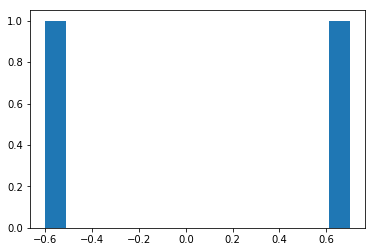

In [8]:

plt.hist(value_array_1[1],15)
plt.show()

In [6]:
values_array_np = np.array(value_array_1)
image_array_np = np.array(image_array, dtype = "float")/255.

[ 0.7 -0.7]


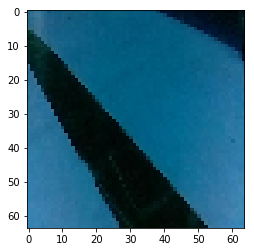

In [13]:
plt.imshow(image_array_np[10],cmap='gray')
print(values_array_np[10])

In [7]:
y = values_array_np
X = image_array_np

In [9]:
type(X[1])
print(X[1].shape)

numpy.ndarray

In [15]:
batch_size = 64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
input_shape = X_train[0].shape
print(input_shape)
#input_shape =(1,64,64)

(64, 64, 3)


## TODO: 
- Test Black/white img
- add Convs etc
- test act.-functions
- make Predictions 
- 

In [17]:
model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation 

model.add(Convolution2D(24, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(36, (3, 3), activation='relu'))
model.add(Convolution2D(48, (5, 5), activation='relu'))
model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(Convolution2D(92, (5, 5), activation='relu'))#sigi
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))#sigmoid
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))#sigi
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 24)        672       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 36)        7812      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 64)        76864     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 92)        147292    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 92)        0         
_________________________________________________________________
dro

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 9626 samples, validate on 2407 samples
Epoch 1/13
9626/9626 [==============================] - 15s - loss: 0.2489 - acc: 0.8848 - val_loss: 0.2120 - val_acc: 0.8970
Epoch 2/13
9626/9626 [==============================] - 11s - loss: 0.2157 - acc: 0.9064 - val_loss: 0.2036 - val_acc: 0.8970
Epoch 3/13
9626/9626 [==============================] - 11s - loss: 0.2070 - acc: 0.9064 - val_loss: 0.1871 - val_acc: 0.8970
Epoch 4/13
9626/9626 [==============================] - 11s - loss: 0.1738 - acc: 0.9059 - val_loss: 0.1348 - val_acc: 0.8970
Epoch 5/13
9626/9626 [==============================] - 11s - loss: 0.1456 - acc: 0.9062 - val_loss: 0.1090 - val_acc: 0.8970
Epoch 6/13
9626/9626 [==============================] - 11s - loss: 0.1294 - acc: 0.9066 - val_loss: 0.1014 - val_acc: 0.8978
Epoch 7/13
9626/9626 [==============================] - 11s - loss: 0.1199 - acc: 0.9113 - val_loss: 0.0946 - val_acc: 0.89

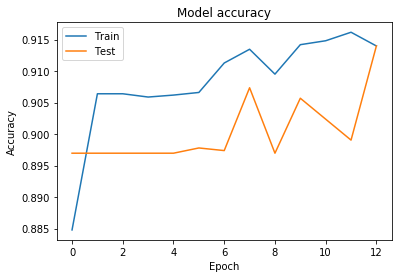

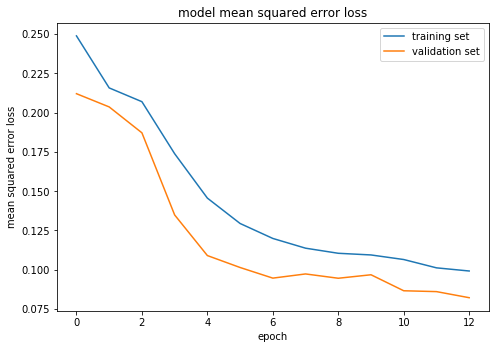

In [18]:
model.compile(loss='mse', optimizer='adam',metrics = ["accuracy"]) #binary_crossentropy ,categorical_crossentropy  
#opti   ,rmsprop
history=model.fit(X_train,y_train, batch_size = batch_size, epochs = 13, verbose = 1, validation_data = (X_test, y_test))
# saving the model 
#model.save(name)
### print the keys contained in the history object
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### plot the training and validation loss for each epoch
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(history.history['loss'])
axes.plot(history.history['val_loss'])
axes.set_title('model mean squared error loss')
axes.set_ylabel('mean squared error loss')
axes.set_xlabel('epoch')
axes.legend(['training set', 'validation set'], loc='upper right')
plt.show()
#model.save(name)
### print the keys contained in the history object
#print(history.history.keys())

Default GPU Device: /device:GPU:0


In [19]:
name = "Relu_model.h5"
model.save(name)

In [20]:
del model